In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv


In [2]:
df = pd.read_csv("/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df = df.drop(columns=['PassengerId'])

# Id можно сразу убрать, это просто порядковый номер в df

In [6]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df['Name'] = df['Name'].map(lambda x: re.sub(r".*(M[A-z]*\.).*", r"\1", x))

# Убираем всё имя, кроме Ms. , Mr

In [8]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs.,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr.,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,Miss.,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,Miss.,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,Mr.,male,26.0,0,0,111369,30.0000,C148,C


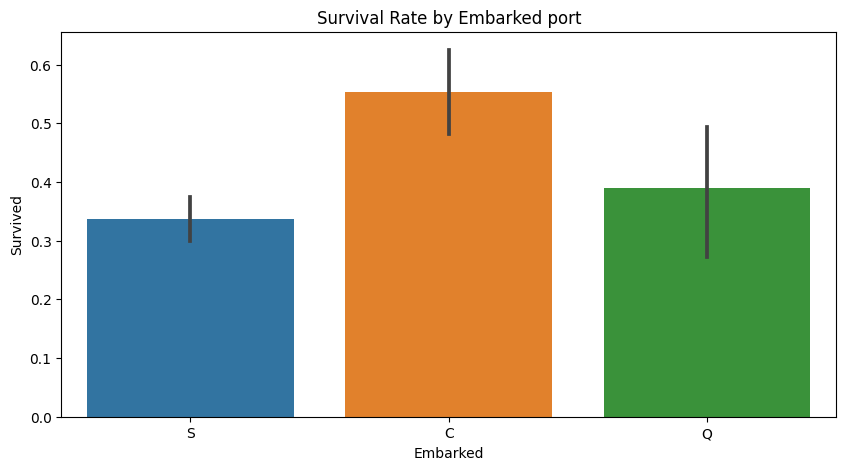

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survival Rate by Embarked port')
plt.show()

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Возможно, порт сильно влияет на шансы

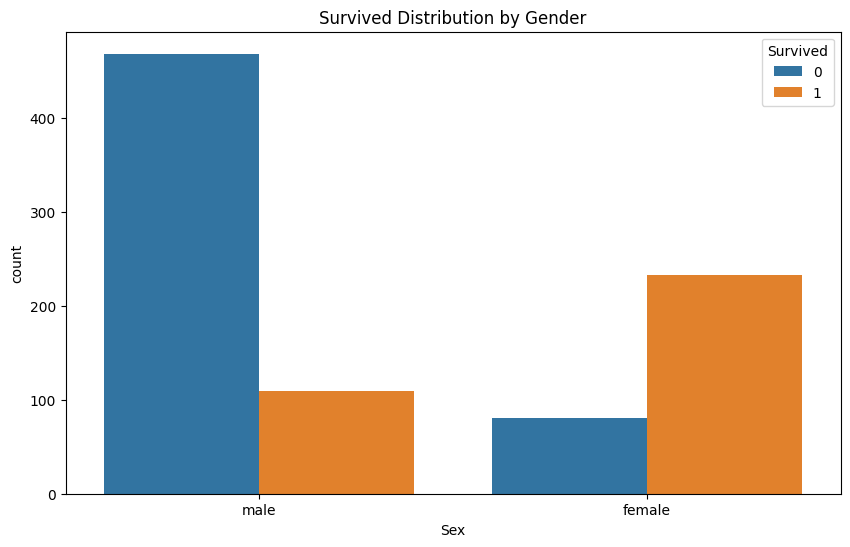

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survived Distribution by Gender')
plt.show()

# Женщины имеют намного более высокие шансы выжить

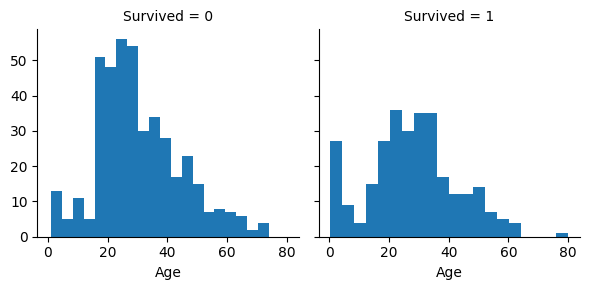

In [12]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Вероятно, сильно влияет, имеется скачок у детей с 0 лет. 
# Гипотеза: более старые люди имеют меньше шансов выжить из-за худшего здоровья, но при этом им помогают, что увеличивает их шансы

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [14]:
df = df.drop(columns=['Cabin'])

In [15]:
df.fillna({"Age": df['Age'].median()},inplace=True)

In [16]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,Mrs.,female,35.0,1,0,113803,53.1000,S
4,0,3,Mr.,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,Miss.,female,19.0,0,0,112053,30.0000,S
888,0,3,Miss.,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,Mr.,male,26.0,0,0,111369,30.0000,C


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [18]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
df.fillna({"Embarked": "S"},inplace=True)

# Заполним поля с пустыми портами отправления самым часты портом

In [20]:
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Новая колонка - вся сеьмя, сумма SibSp и Parch.

In [21]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Кодируем все object'ы к 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Разбиваем df на тест и тренировку

In [23]:
clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [30,32,35,37,40], "max_depth": [10, 12, 14, 15]}

# Определим важные поля с помощью RandomForestClassifier

In [24]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)

In [25]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 14, 15],
                         'n_estimators': [30, 32, 35, 37, 40]})

In [26]:
grid_search_cv_clf.best_params_

{'max_depth': 12, 'n_estimators': 40}

In [27]:
grid_search_cv_clf.best_estimator_.feature_importances_

array([0.07565382, 0.13152394, 0.20357106, 0.14087776, 0.02591625,
       0.01988241, 0.18776941, 0.14326557, 0.02108657, 0.0504532 ])

In [28]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8435754189944135

In [29]:
df.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,-0.218467,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,-0.002840,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.162098,0.065997
Name,-0.218467,-0.002840,1.000000,0.306887,0.297124,-0.230540,-0.162928,-0.011925,-0.088462,0.049395,-0.238962
Sex,-0.543351,0.131900,0.306887,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.108262,-0.200988
Age,-0.064910,-0.339898,0.297124,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.018754,-0.245619
SibSp,-0.035322,0.083081,-0.230540,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.068230,0.890712
Parch,0.081629,0.018443,-0.162928,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.039798,0.783111
Ticket,-0.164549,0.319869,-0.011925,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.001729,0.064302
Fare,0.257307,-0.549500,-0.088462,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,0.049395,0.108262,-0.018754,0.068230,0.039798,-0.001729,-0.224719,1.000000,0.066516


# Плохо, что имеется корреляция между Parch, SibSp и FamilySize, так как это мешает RandomForest

In [30]:
feature_importance_df = pd.DataFrame({"features":list(X_train),
                                      "feature_importances": grid_search_cv_clf.best_estimator_.feature_importances_})
feature_importance_df.sort_values("feature_importances", ascending=True)

,features,feature_importances
5,Parch,0.019882
8,Embarked,0.021087
4,SibSp,0.025916
9,FamilySize,0.050453
0,Pclass,0.075654
1,Name,0.131524
3,Age,0.140878
7,Fare,0.143266
6,Ticket,0.187769
2,Sex,0.203571


# Попробуем построить RandomForest без Parch, Embarked, SibSp, так как это самые незначительные показатели, а так же мы исключим корреляцию

In [31]:
X = df.drop(columns=['Survived', 'Parch', 'Embarked', 'SibSp'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [17,19,21,23], "max_depth": [7,9,10,11]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 17}

In [32]:
grid_search_cv_clf.best_estimator_.feature_importances_

array([0.0771241 , 0.13266774, 0.21415043, 0.16559476, 0.16434855,
       0.16920211, 0.07691231])

In [33]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.7932960893854749

In [34]:
X = df.drop(columns=['Survived', 'Parch', 'SibSp'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [7,9,11,13], "max_depth": [5,7,9]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 13}

In [35]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8044692737430168

In [36]:
X = df.drop(columns=['Survived', 'SibSp'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [12,14,16,17], "max_depth": [8,9,10,11]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 11, 'n_estimators': 14}

In [37]:
grid_search_cv_clf.best_estimator_.score(X_test, y_test)

0.8435754189944135

Итого:
*     С учетом всех столбцов                   0.8324 0.8100 0.8268 0.8268 0.8379      0.82678
*     **Без 'Parch', 'Embarked', 'SibSp'       0.8603 0.8324 0.8044 0.8100 0.8491      0.83124**
*     Без 'Embarked', 'SibSp'                  0.8324 0.8044 0.8212 0.8044 0.7877      0.81002
*     Без 'SibSp'                              0.8156 0.8437 0.8100 0.8100 0.8156      0.81898

# Из-за рандомности распределения данных, необходимо смотреть на несколько прогонов. По итогу пяти лучше всех себя показал вариант **Без 'Parch', 'Embarked', 'SibSp'**

In [38]:
#df = df.drop(columns =['Parch', 'Embarked', 'SibSp'])
df = df.drop(columns =['Embarked'])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize
0,0,3,19,1,22.0,1,0,523,7.2500,1
1,1,1,20,0,38.0,1,0,596,71.2833,1
2,1,3,14,0,26.0,0,0,669,7.9250,0
3,1,1,20,0,35.0,1,0,49,53.1000,1
4,0,3,19,1,35.0,0,0,472,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,17,1,27.0,0,0,101,13.0000,0
887,1,1,14,0,19.0,0,0,14,30.0000,0
888,0,3,14,0,28.0,1,2,675,23.4500,3
889,1,1,19,1,26.0,0,0,8,30.0000,0


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5387 - loss: 0.6898 - val_accuracy: 0.6503 - val_loss: 0.6809
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5702 - loss: 0.6875 - val_accuracy: 0.6503 - val_loss: 0.6729
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6069 - loss: 0.6731 - val_accuracy: 0.6503 - val_loss: 0.6641
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5971 - loss: 0.6697 - val_accuracy: 0.6503 - val_loss: 0.6562
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6059 - loss: 0.6735 - val_accuracy: 0.6503 - val_loss: 0.6489
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6283 - loss: 0.6584 - val_accuracy: 0.6503 - val_loss: 0.6419
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6298 - loss: 0.6593 - val_accuracy: 0.6503 - val_loss: 0.6359
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6334 - loss: 0.6524 - val_accuracy: 0.6503 - val_loss: 0.6309


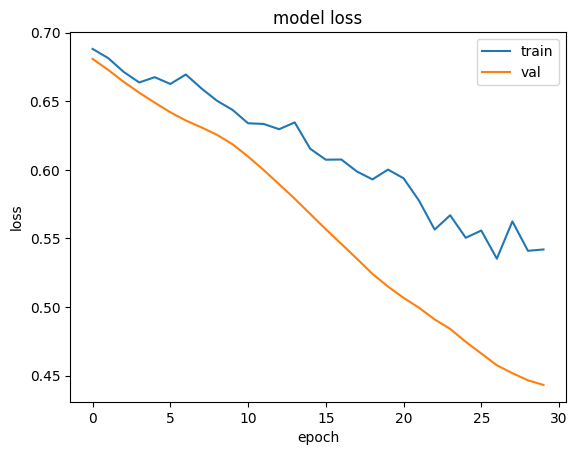

In [39]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
import matplotlib.pyplot as plt



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation = "leaky_relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "softmax"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "leaky_relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "leaky_relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Несколько моделей сохранены в конце, дальше разбирается лучшая из полученных

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report


model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "leaky_relu"))
model.add(Dense(1,activation = 'sigmoid' ))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)



kf = KFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []
losses = []
X1 = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
for train_index, test_index in kf.split(X):
    
    # Use iloc for integer-based indexing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    history = model.fit(X_train, y_train, 
                        epochs=30, batch_size=128, 
                        validation_data=(X_test, y_test),
                        verbose=0)
    y_pred = model.predict(X_test)    
    if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
        best_pred = y_pred
    accuracies.append(history.history['val_accuracy'][-1])
    losses.append(history.history['val_loss'][-1])

    # Create the confusion matrix
    conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Calculate and print accuracy, precision, recall, F1-score
    print("\nClassification Report:")
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))
best_model_index = np.argmax(accuracies)
print(f"Best model index: {best_model_index}")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(accuracies):.4f}")
print(f"Average Loss: {np.mean(losses):.4f}")
print(f"Standard Deviation of Loss: {np.std(losses):.4f}")

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6182 - loss: 14.1313 - val_accuracy: 0.6503 - val_loss: 7.2684
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5596 - loss: 7.5720 - val_accuracy: 0.3357 - val_loss: 6.3998
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3174 - loss: 8.0320 - val_accuracy: 0.3217 - val_loss: 4.9651
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3844 - loss: 5.7178 - val_accuracy: 0.6434 - val_loss: 3.8222
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5832 - loss: 5.0550 - val_accuracy: 0.5664 - val_loss: 2.9443
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4551 - loss: 4.2244 - val_accuracy: 0.3566 - val_loss: 2.9350
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3474 - loss: 3.5397 - val_accuracy: 0.5315 - val_loss: 2.0184
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5393 - loss: 3.0030 - val_accuracy: 0.5385 - val_loss: 1.6436
Epoch

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
    best_pred = y_pred
accuracies.append(history.history['val_accuracy'][-1])
losses.append(history.history['val_loss'][-1])

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy, precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))
tn, fp, fn, tp = conf_matrix.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[98  7]
 [31 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       105
           1       0.86      0.58      0.69        74

    accuracy                           0.79       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.79      0.78       179



In [42]:
dict = classification_report(y_test, (y_pred > 0.5).astype(int), output_dict=True)
print(dict)
print(f"tn: {tn} \nfp: {fp}\nfn: {fn}\ntp: {tp} \n")

{'0': {'precision': 0.7596899224806202, 'recall': 0.9333333333333333, 'f1-score': 0.8376068376068376, 'support': 105}, '1': {'precision': 0.86, 'recall': 0.581081081081081, 'f1-score': 0.6935483870967741, 'support': 74}, 'accuracy': 0.7877094972067039, 'macro avg': {'precision': 0.80984496124031, 'recall': 0.7572072072072071, 'f1-score': 0.7655776123518059, 'support': 179}, 'weighted avg': {'precision': 0.801158893075224, 'recall': 0.7877094972067039, 'f1-score': 0.7780519474518394, 'support': 179}}
tn: 98 
fp: 7
fn: 31
tp: 43 



# Выводы

В итоге проделанной работы была получена модель, и её анализ. точность на тестовой выборке 0.81.

TP(истинно-положительные) - 86

FP(ложно-положительные) - 19

TN(истинно-отрицательные) - 55

FN(ложно-отрицательные) - 19

Модель показала хороший уровень точности при классификации пассажиров Титаника.
Модель лучше различает выживших (с более высокой пометкой) чем не выживших.
Небольшое количество ложноположительных предсказаний (FP) говорит о низком риске неправильной классификации выживших как погибших.

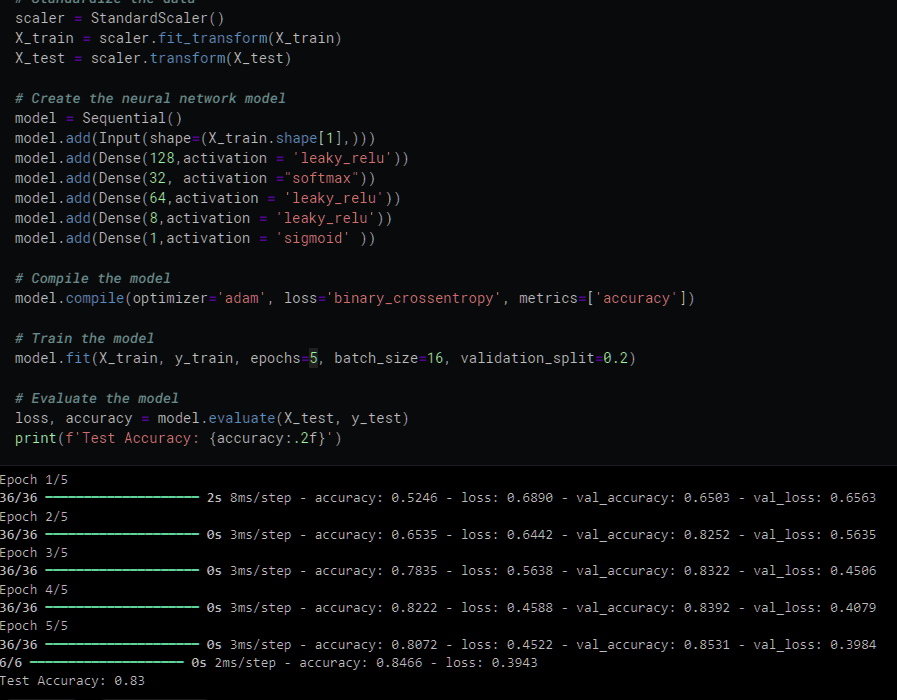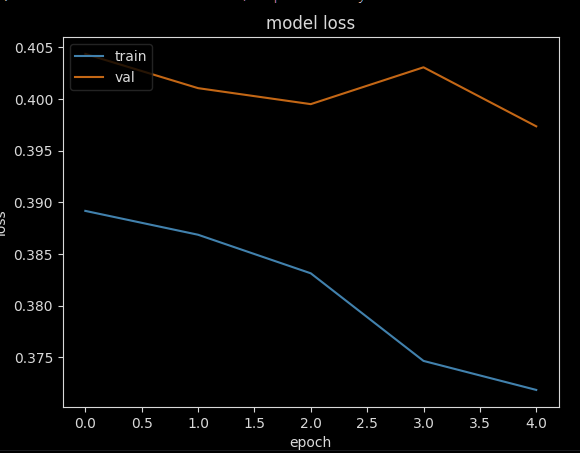

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1,activation = 'sigmoid' ))
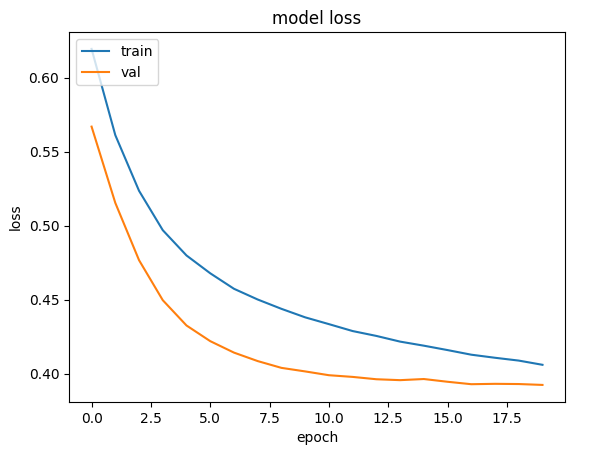

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "exponential"))
model.add(Dense(1,activation = 'sigmoid' ))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

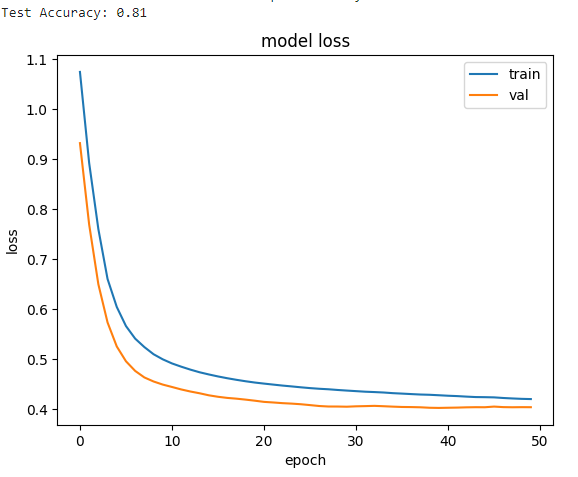